## Data cleaning

In [43]:
import pandas as pd
apps_dupes = pd.read_csv(r'C:\Users\KIIT\OneDrive\Desktop\DA project\googleplaystore.csv')
apps = apps_dupes.drop_duplicates(subset = 'App')
print('Total number of apps in our dataset:', apps['App'].value_counts().sum())


Total number of apps in our dataset: 9660


In [44]:
apps = apps.drop(['Last Updated','Current Ver', 'Android Ver'], axis=1)


In [45]:
clean_chars = ['+', ',', '$','_']
# List of column names to clean
clean_cols = ['Installs', 'Price', 'Category']
for col in clean_cols:
    for char in clean_chars:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, '  '))

In [78]:
import numpy as np
apps["Type"] = pd.to_numeric(apps["Type"], errors = 'coerce')
apps["Installs"] = pd.to_numeric(apps["Installs"], errors = 'coerce')
print(apps.dtypes)
n=10
apps.sample(n)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs          float64
Type              float64
Price              object
Content Rating     object
Genres             object
dtype: object


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
9696,EP RSS Reader,COMMUNICATION,3.8,4,892k,100.0,NaN,0,Everyone,Communication
3673,Free TV series,VIDEO PLAYERS,3.7,400,7.2M,NaN,NaN,0,Teen,Video Players & Editors
7483,CK Pharmacies,HEALTH AND FITNESS,2.7,3,9.4M,100.0,NaN,0,Everyone 10+,Health & Fitness
919,FOX NOW - On Demand & Live TV,ENTERTAINMENT,3.9,60841,Varies with device,NaN,NaN,0,Teen,Entertainment
9383,Soldiers of Glory: Modern War,FAMILY,4.2,64815,23M,NaN,NaN,0,Teen,Strategy
7088,CA Case Management,BUSINESS,2.4,16,5.2M,500.0,NaN,0,Everyone,Business
7592,Blamburger - Clarence,FAMILY,4.1,30444,27M,NaN,NaN,0,Everyone 10+,Arcade;Action & Adventure
6565,Bo's Dinnertime Story,FAMILY,4.3,6,33M,NaN,NaN,2.49,Everyone,Education;Pretend Play
6979,Roulette Advisor LITE,GAME,4.1,41,1.4M,NaN,NaN,0,Everyone,Casino
597,Luxy Pro- Elite Dating Single,DATING,3.9,742,26M,NaN,NaN,0,Mature 17+,Dating


# We visualize the App Categories and the number of apps distributed in each category using graphs

Number of categories =  34


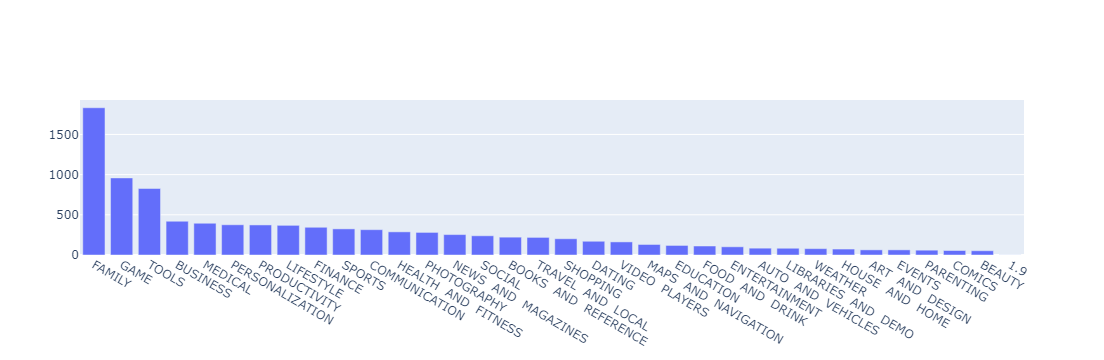

In [51]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as graph

num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [graph.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

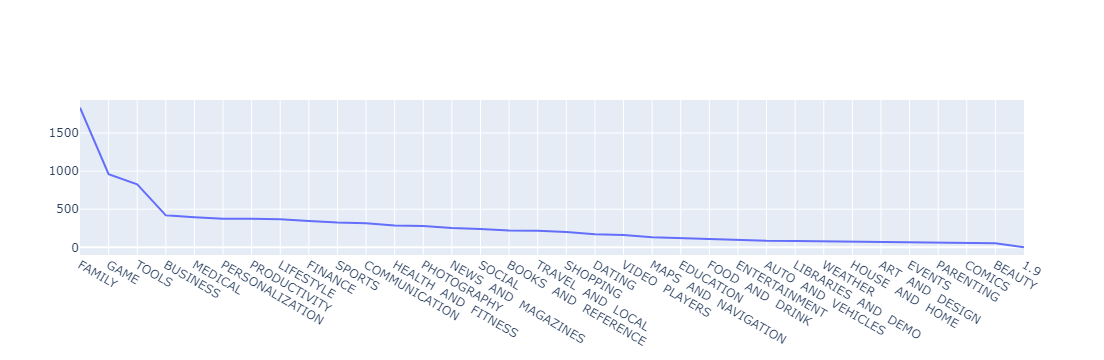

In [52]:
data = [graph.Scatter(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

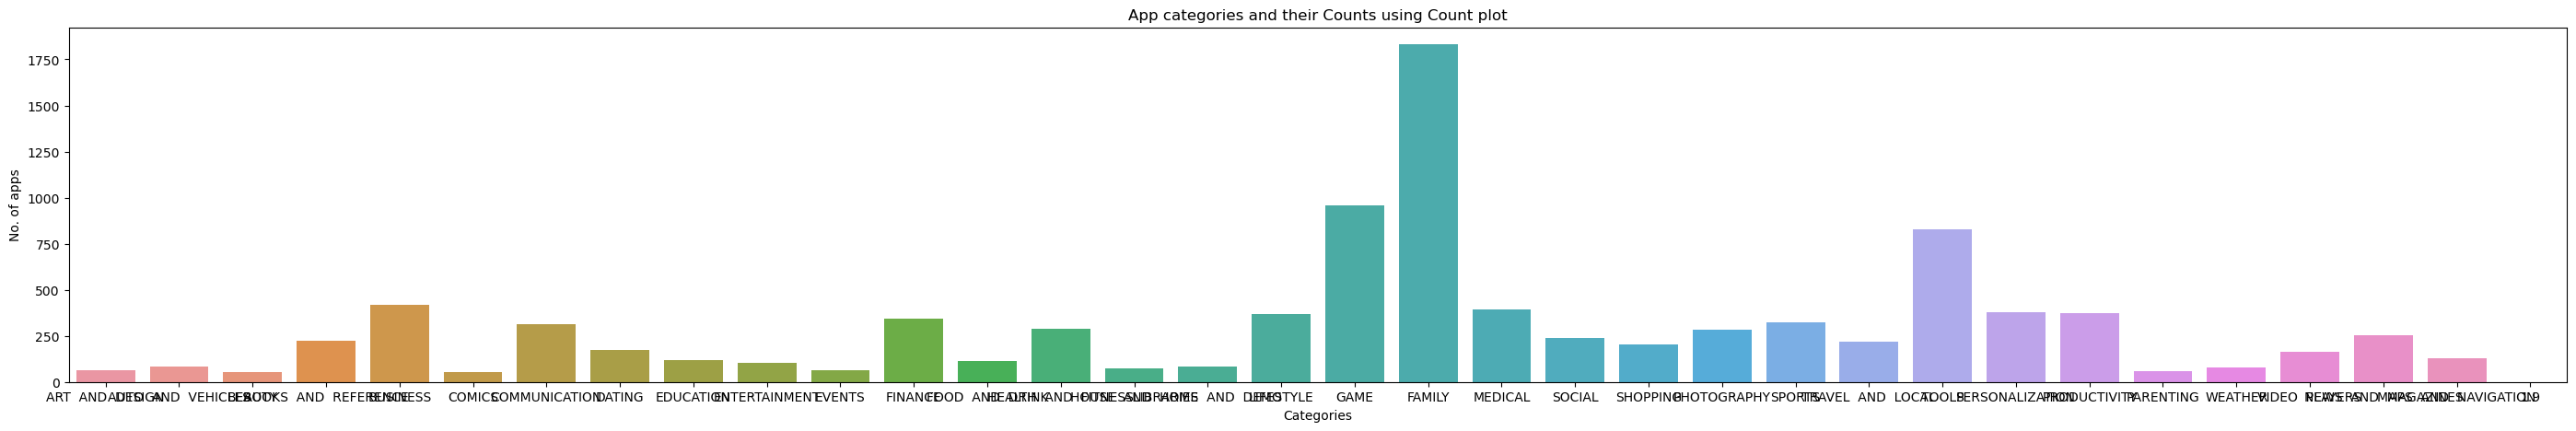

In [70]:
import seaborn as sns
plt.figure(figsize=(35, 5))
sns.countplot(x='Category', data=apps)
plt.title('App categories and their Counts using Count plot')
plt.xlabel('Categories')
plt.ylabel('No. of apps')
plt.show()

In [87]:
''' It's observed from the dataset that, the most popular and pervasive app categories are 'Game' and 'Family'. This gives the business an insight on which app market is prevalent at current time.'''

" It's observed from the dataset that, the most popular and pervasive app categories are 'Game' and 'Family'. This gives the business an insight on which app market is prevalent at current time."

# App ratings and representation of their distribution

In [65]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

Average app rating =  4.17505184823716


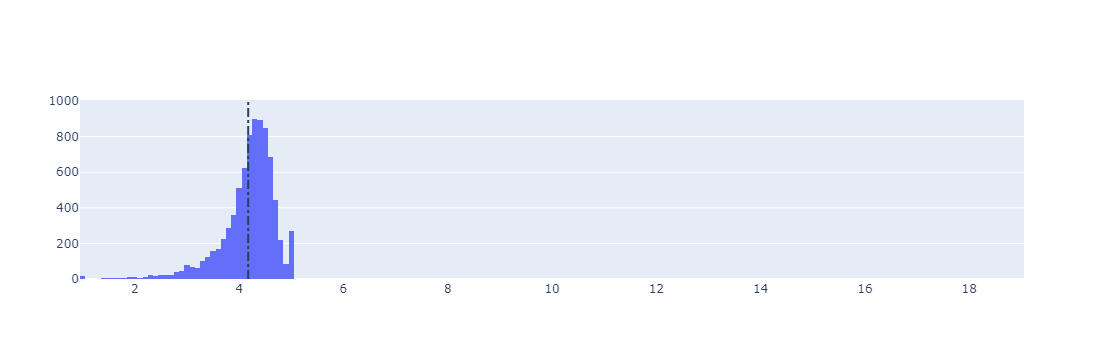

In [66]:
# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

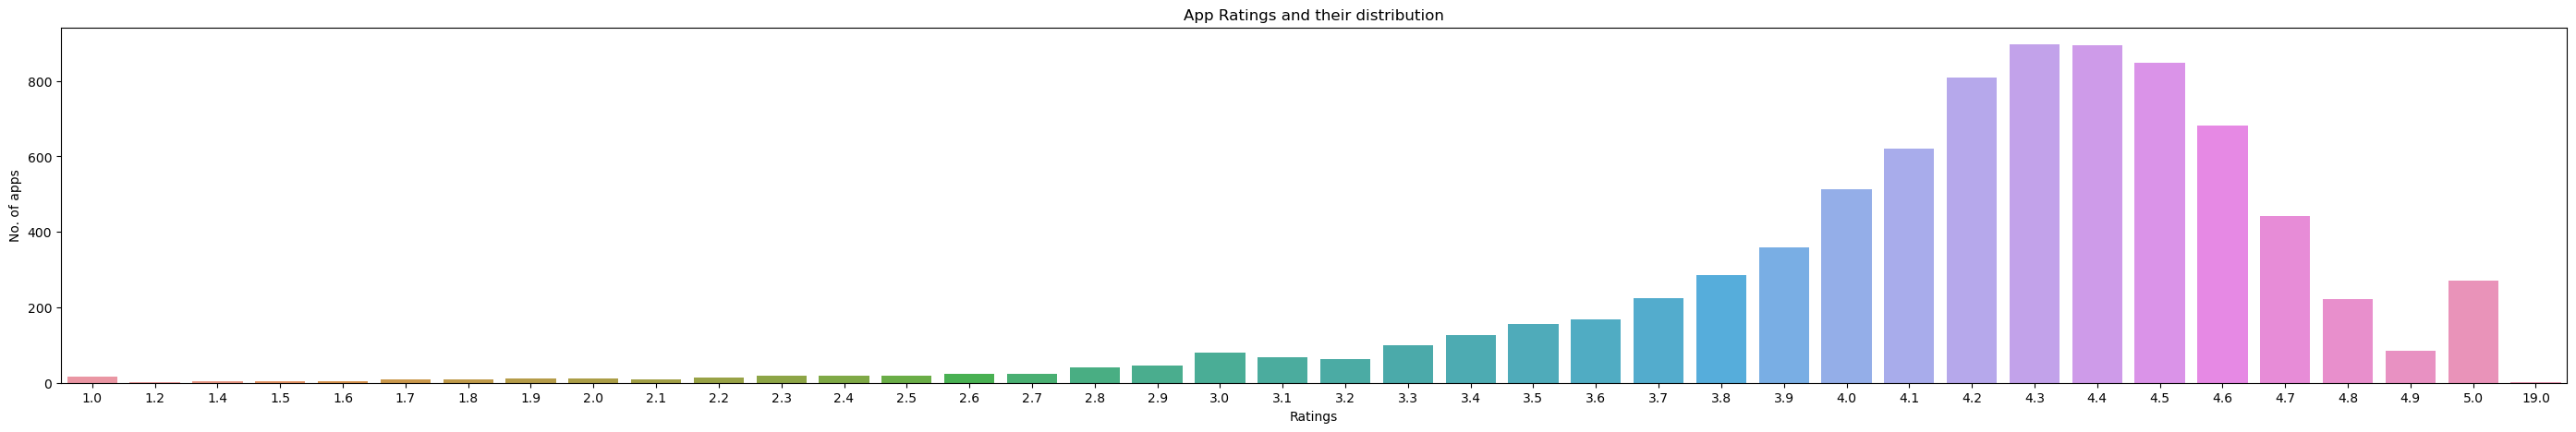

In [69]:
import seaborn as sns
plt.figure(figsize=(35, 5))
sns.countplot(x='Rating', data=apps)
plt.title('App Ratings and their distribution')
plt.xlabel('Ratings')
plt.ylabel('No. of apps')
plt.show()

In [86]:
''' The distribution of app ratings tells us that most of the apps are highly rated, as the histogram is skewed to the left. This gives an insight into the type of apps that are preferred by the users. '''


' The distribution of app ratings tells us that most of the apps are highly rated, as the histogram is skewed to the left. This gives an insight into the type of apps that are preferred by the users. '